# Check boundary scavenging conditions:

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle

%matplotlib notebook

In [25]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

In [16]:
ref       = nc.Dataset('/data/brogalla/ANHA12/ANHA12-EXH006_5d_gridT_y2015m01d05.nc',  'r')
lat_model = np.array(ref.variables['nav_lat'])
lon_model = np.array(ref.variables['nav_lon'])

In [17]:
E_lats = lat_model[1481:2178, 778:798]
E_lons = lon_model[1481:2178, 778:798]
N_lats = lat_model[2168:2178, 201:798]
N_lons = lon_model[2168:2178, 201:798]
S_lats = lat_model[1482:1492, 181:798]
S_lons = lon_model[1482:1492, 181:798]

Read in boundary condition files:

In [18]:
EOBC = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Mn_East_OBC_20191202.nc')
NOBC = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Mn_North_OBC_20191202.nc')
SOBC = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Mn_South_OBC_20190614.nc')
dMn_EOBC = np.array(EOBC.variables['dMn']).reshape((50,697,20))
dMn_NOBC = np.array(NOBC.variables['dMn']).reshape((50,10,597))
dMn_SOBC = np.array(SOBC.variables['dMn']).reshape((50,10,617))
oMn_EOBC = np.array(EOBC.variables['oMn']).reshape((50,697,20))
oMn_NOBC = np.array(NOBC.variables['oMn']).reshape((50,10,597))
oMn_SOBC = np.array(SOBC.variables['oMn']).reshape((50,10,617))

Plot boundaries:

<IPython.core.display.Javascript object>


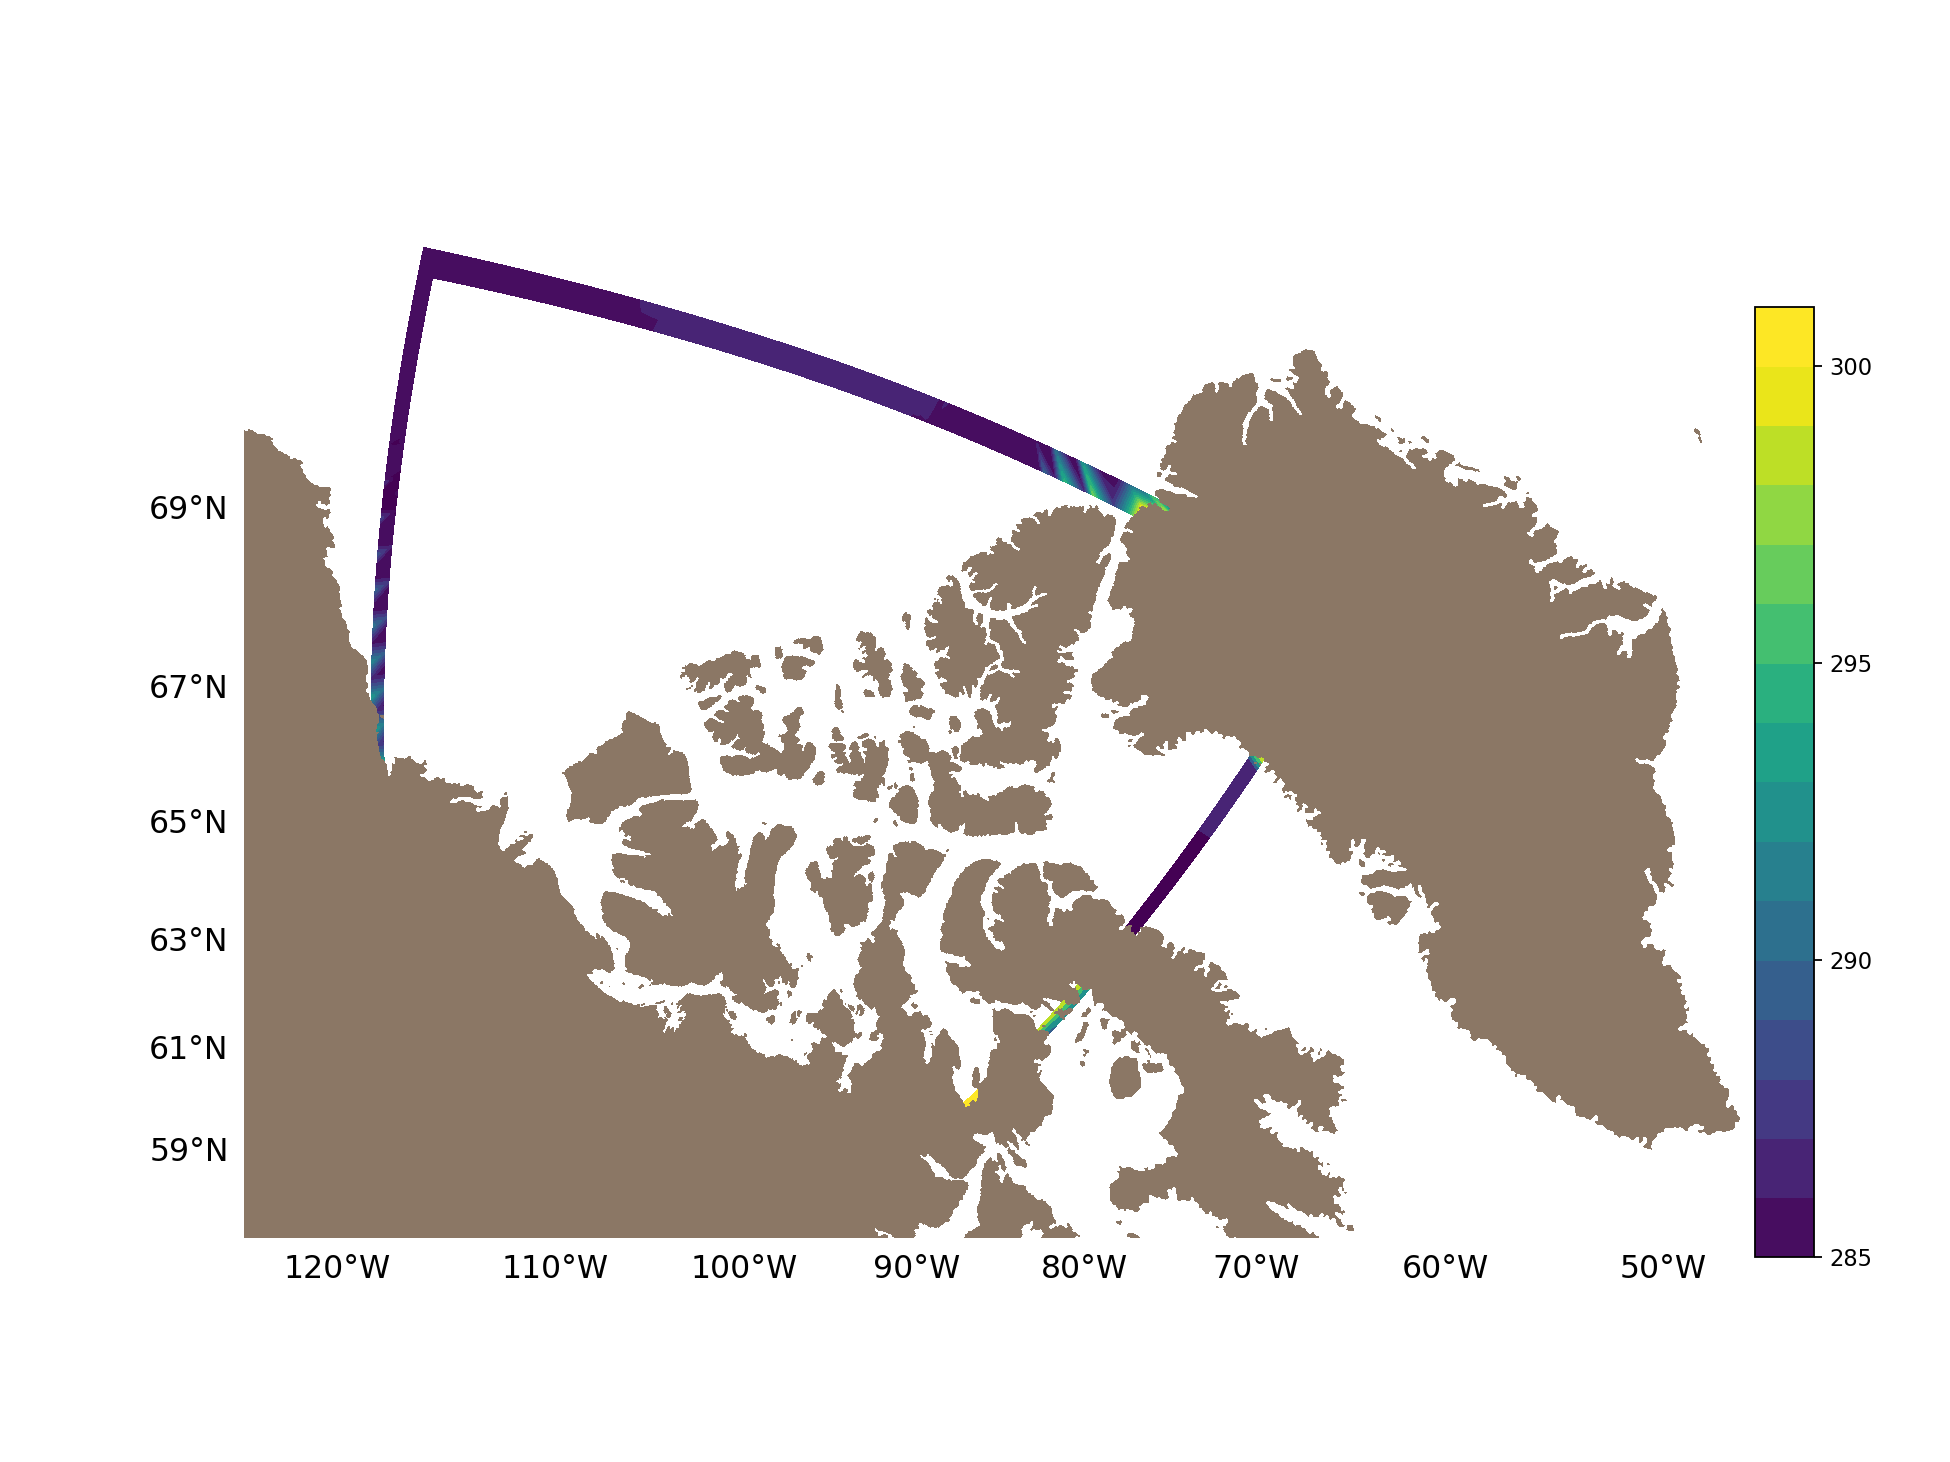

In [42]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

xE, yE = proj1(E_lons, E_lats)
xN, yN = proj1(N_lons, N_lats)
xS, yS = proj1(S_lons, S_lats)

CB1 = proj1.contourf(xE, yE, np.divide(dMn_EOBC[0,:,:], oMn_EOBC[0,:,:]), 15, vmin=285, vmax=300)
proj1.contourf(xN, yN, np.divide(dMn_NOBC[0,:,:], oMn_NOBC[0,:,:]), 15, vmin=285, vmax=300)
proj1.contourf(xS, yS, np.divide(dMn_SOBC[0,:,:], oMn_SOBC[0,:,:]), 15, vmin=285, vmax=300)

cbaxes = fig.add_axes([0.90, 0.14, 0.03, 0.65]) 
CBar = plt.colorbar(CB1, ax=ax1, cax=cbaxes, ticks=[285, 290, 295, 300]) 

What the ratio actually should look like:

In [19]:
# At stn 1 in Canada Basin:
stn1i = 547; stn1j = 457;

In [20]:
refdata  = nc.Dataset('/data/brogalla/run_storage/ref-2005/ANHA12_EXH006_2005_monthly.nc', 'r')
dMn_2005 = np.array(refdata.variables['dissolmn'])[5,0,:,:,:]
oMn_2005 = np.array(refdata.variables['oxidismn'])[5,0,:,:,:]

<IPython.core.display.Javascript object>


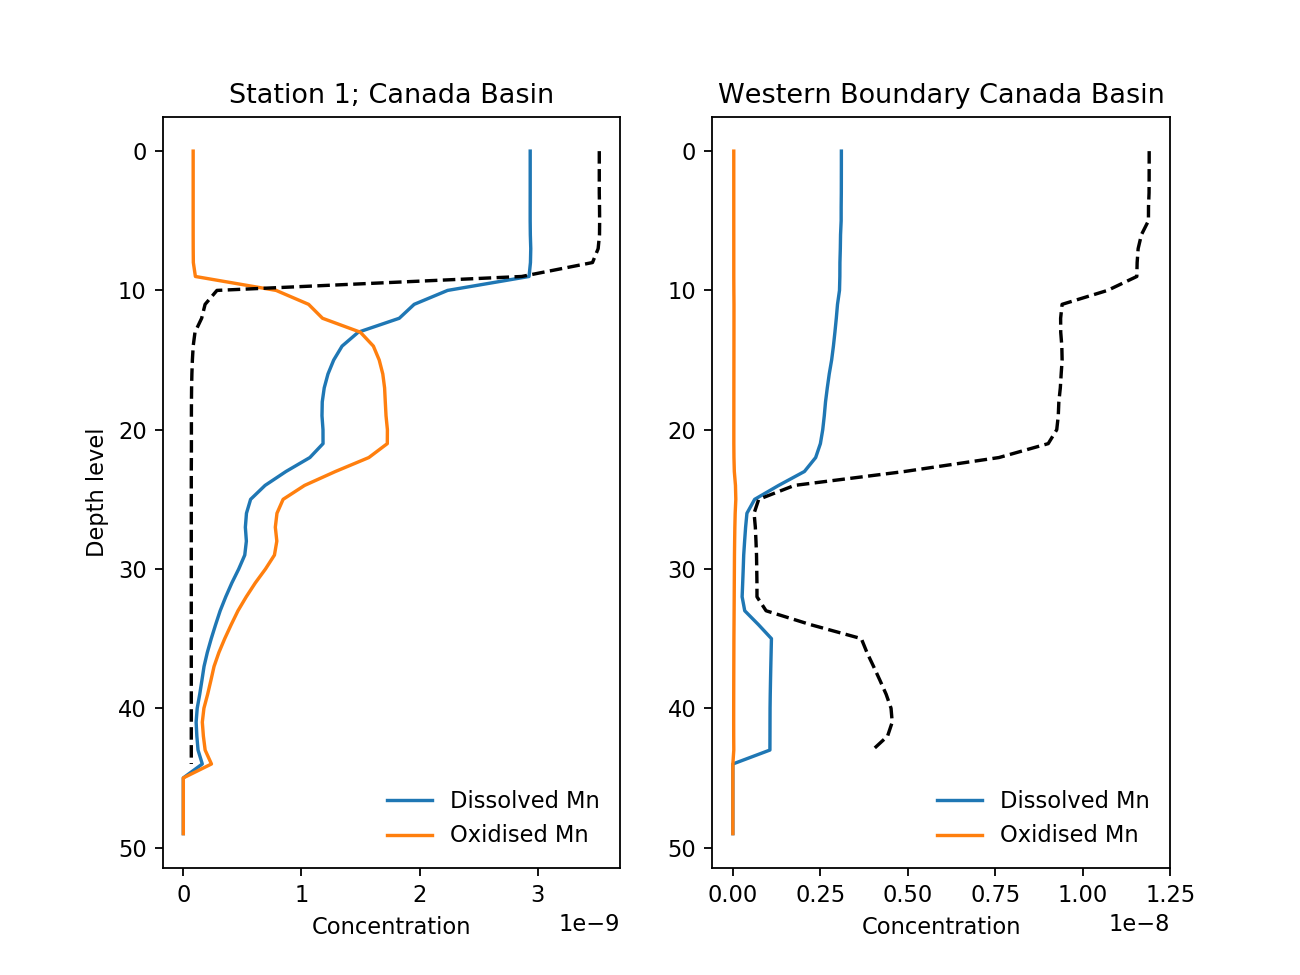

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Western Boundary Canada Basin')

In [140]:
fig, ax = plt.subplots(1,2, figsize=(8,6))
ax[0].invert_yaxis()
ax[0].set_xlabel('Concentration')
ax[0].set_ylabel('Depth level')
ax[0].plot(dMn_2005[:,stn1i,stn1j], np.arange(0,50), label='Dissolved Mn')
ax[0].plot(oMn_2005[:,stn1i,stn1j], np.arange(0,50), label='Oxidised Mn')
ax[0].plot(np.divide(dMn_2005[:,stn1i,stn1j],oMn_2005[:,stn1i,stn1j])*1e-10, np.arange(0,50), '--k')
ax[0].legend(frameon=False)
ax[0].set_title('Station 1; Canada Basin')

ax[1].invert_yaxis()
ax[1].set_xlabel('Concentration')
ax[1].plot(dMn_2005[:,694,stn1j], np.arange(0,50), label='Dissolved Mn')
ax[1].plot(oMn_2005[:,694,stn1j], np.arange(0,50), label='Oxidised Mn')
ax[1].plot(np.divide(dMn_2005[:,694,stn1j],oMn_2005[:,694,stn1j])*1e-10, np.arange(0,50), '--k')
ax[1].legend(frameon=False)
# ax[1].set_xlim([0, 5e-9])
ax[1].set_title('Western Boundary Canada Basin')

Compare with boundary forcing:

In [8]:
print('Oxidised: ', np.amax(oMn_NOBC[:,5,494]), np.amin(oMn_NOBC[:,5,494]))
print('Dissolved: ', np.amax(dMn_NOBC[:,5,494]), np.amin(dMn_NOBC[:,5,494]))

Oxidised:  4.0348273327252806e-11 8.178295635942561e-12
Dissolved:  3.000000026176508e-09 8.722903990725486e-10


<IPython.core.display.Javascript object>


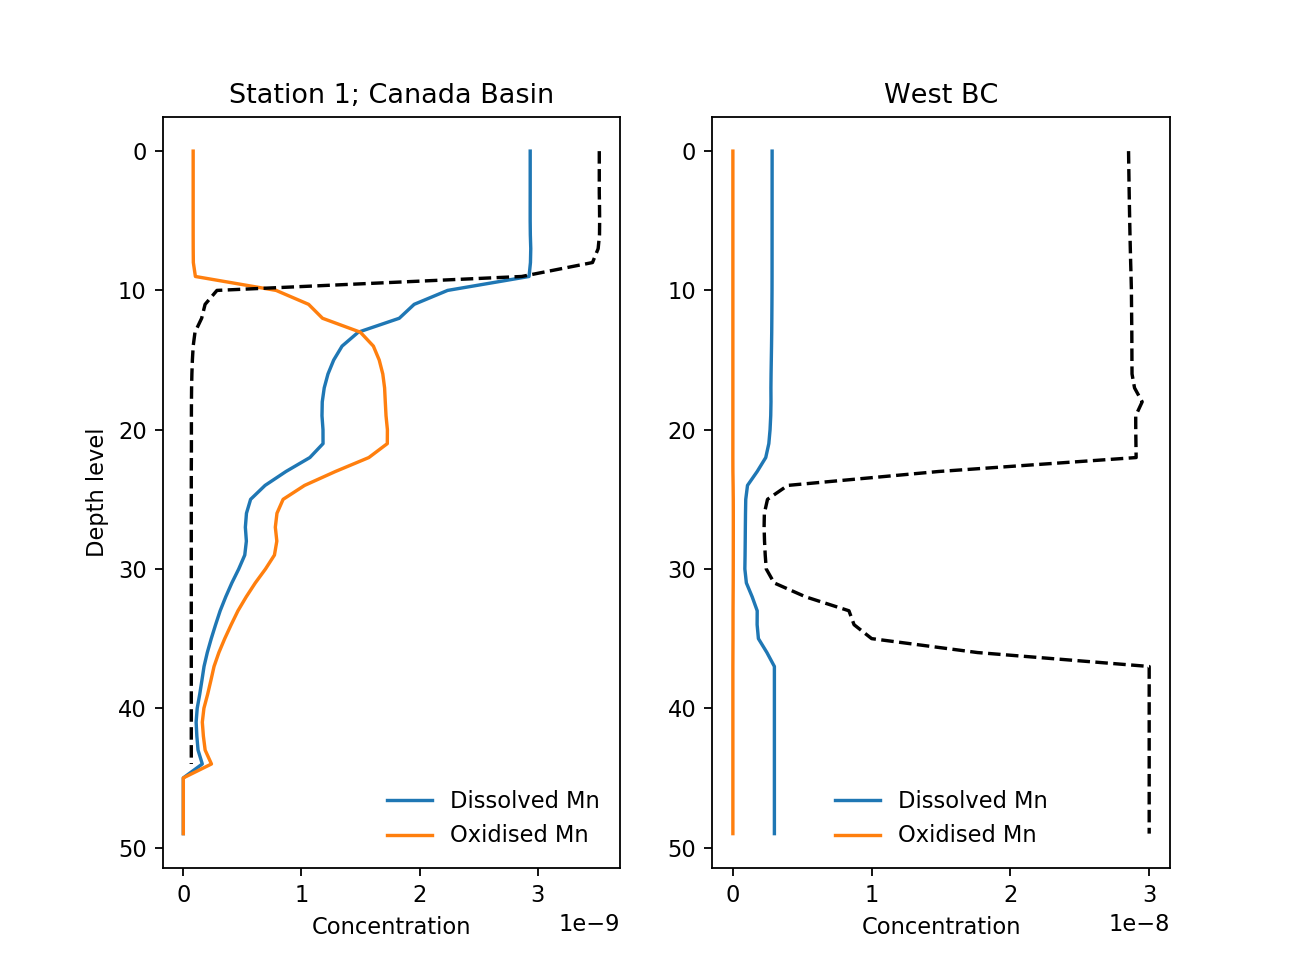

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0.5, 1.0, 'West BC')

In [123]:
fig, ax = plt.subplots(1,2, figsize=(8,6))
ax[0].invert_yaxis()
ax[0].set_xlabel('Concentration')
ax[0].set_ylabel('Depth level')
ax[0].plot(dMn_2005[:,stn1i,stn1j], np.arange(0,50), label='Dissolved Mn')
ax[0].plot(oMn_2005[:,stn1i,stn1j], np.arange(0,50), label='Oxidised Mn')
ax[0].plot(np.divide(dMn_2005[:,stn1i,stn1j],oMn_2005[:,stn1i,stn1j])*1e-10, np.arange(0,50), '--k')
ax[0].legend(frameon=False)
ax[0].set_title('Station 1; Canada Basin')

ax[1].invert_yaxis()
ax[1].set_xlabel('Concentration')
ax[1].plot(dMn_NOBC[:,5,494], np.arange(0,50), label='Dissolved Mn')
ax[1].plot(oMn_NOBC[:,5,494], np.arange(0,50), label='Oxidised Mn')
ax[1].plot(np.divide(dMn_NOBC[:,5,494],oMn_NOBC[:,5,494])*1e-10, np.arange(0,50), '--k')
ax[1].legend(frameon=False)
# ax[1].set_xlim([0, 5e-9])
ax[1].set_title('West BC')

And in the initial conditions:

<IPython.core.display.Javascript object>


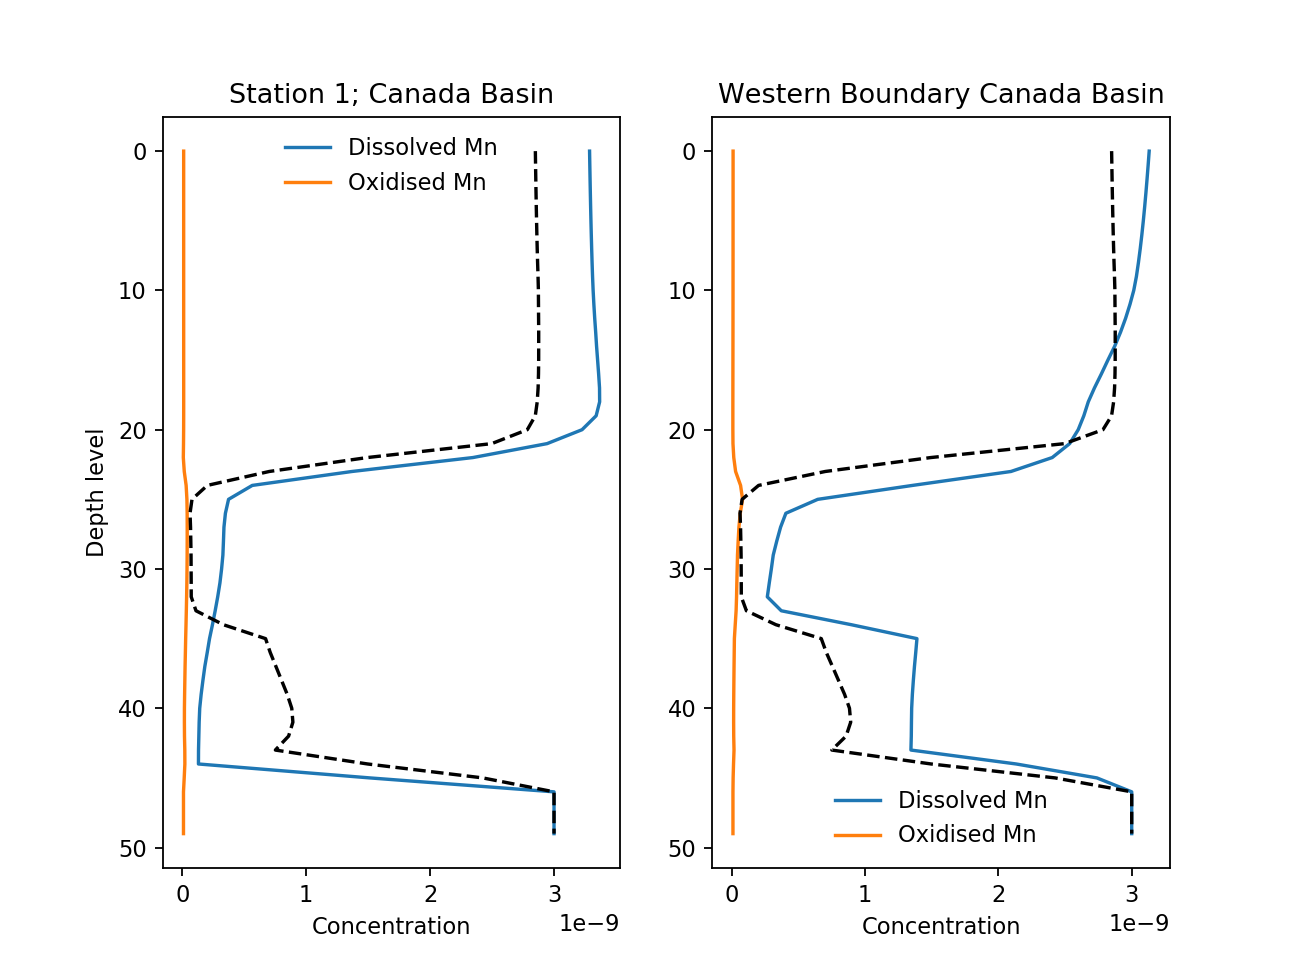

Text(0.5, 1.0, 'Western Boundary Canada Basin')

In [128]:
fig, ax = plt.subplots(1,2, figsize=(8,6))
ax[0].invert_yaxis()
ax[0].set_xlabel('Concentration')
ax[0].set_ylabel('Depth level')
ax[0].plot(ini_dMn[:,stn1i,stn1j], np.arange(0,50), label='Dissolved Mn')
ax[0].plot(ini_oMn[:,stn1i,stn1j], np.arange(0,50), label='Oxidised Mn')
ax[0].plot(np.divide(ini_dMn[:,694,stn1j],ini_oMn[:,694,stn1j])*1e-11, np.arange(0,50), '--k')
ax[0].legend(frameon=False)
ax[0].set_title('Station 1; Canada Basin')

ax[1].invert_yaxis()
ax[1].set_xlabel('Concentration')
ax[1].plot(ini_dMn[:,694,stn1j], np.arange(0,50), label='Dissolved Mn')
ax[1].plot(ini_oMn[:,694,stn1j], np.arange(0,50), label='Oxidised Mn')
ax[1].plot(np.divide(ini_dMn[:,694,stn1j],ini_oMn[:,694,stn1j])*1e-11, np.arange(0,50), '--k')
ax[1].legend(frameon=False)
ax[1].set_title('Western Boundary Canada Basin')

So clearly, there is a problem with the boundary forcing.

Boundaries have much much more dMn compared to oMn in the center of the domain. 

<IPython.core.display.Javascript object>


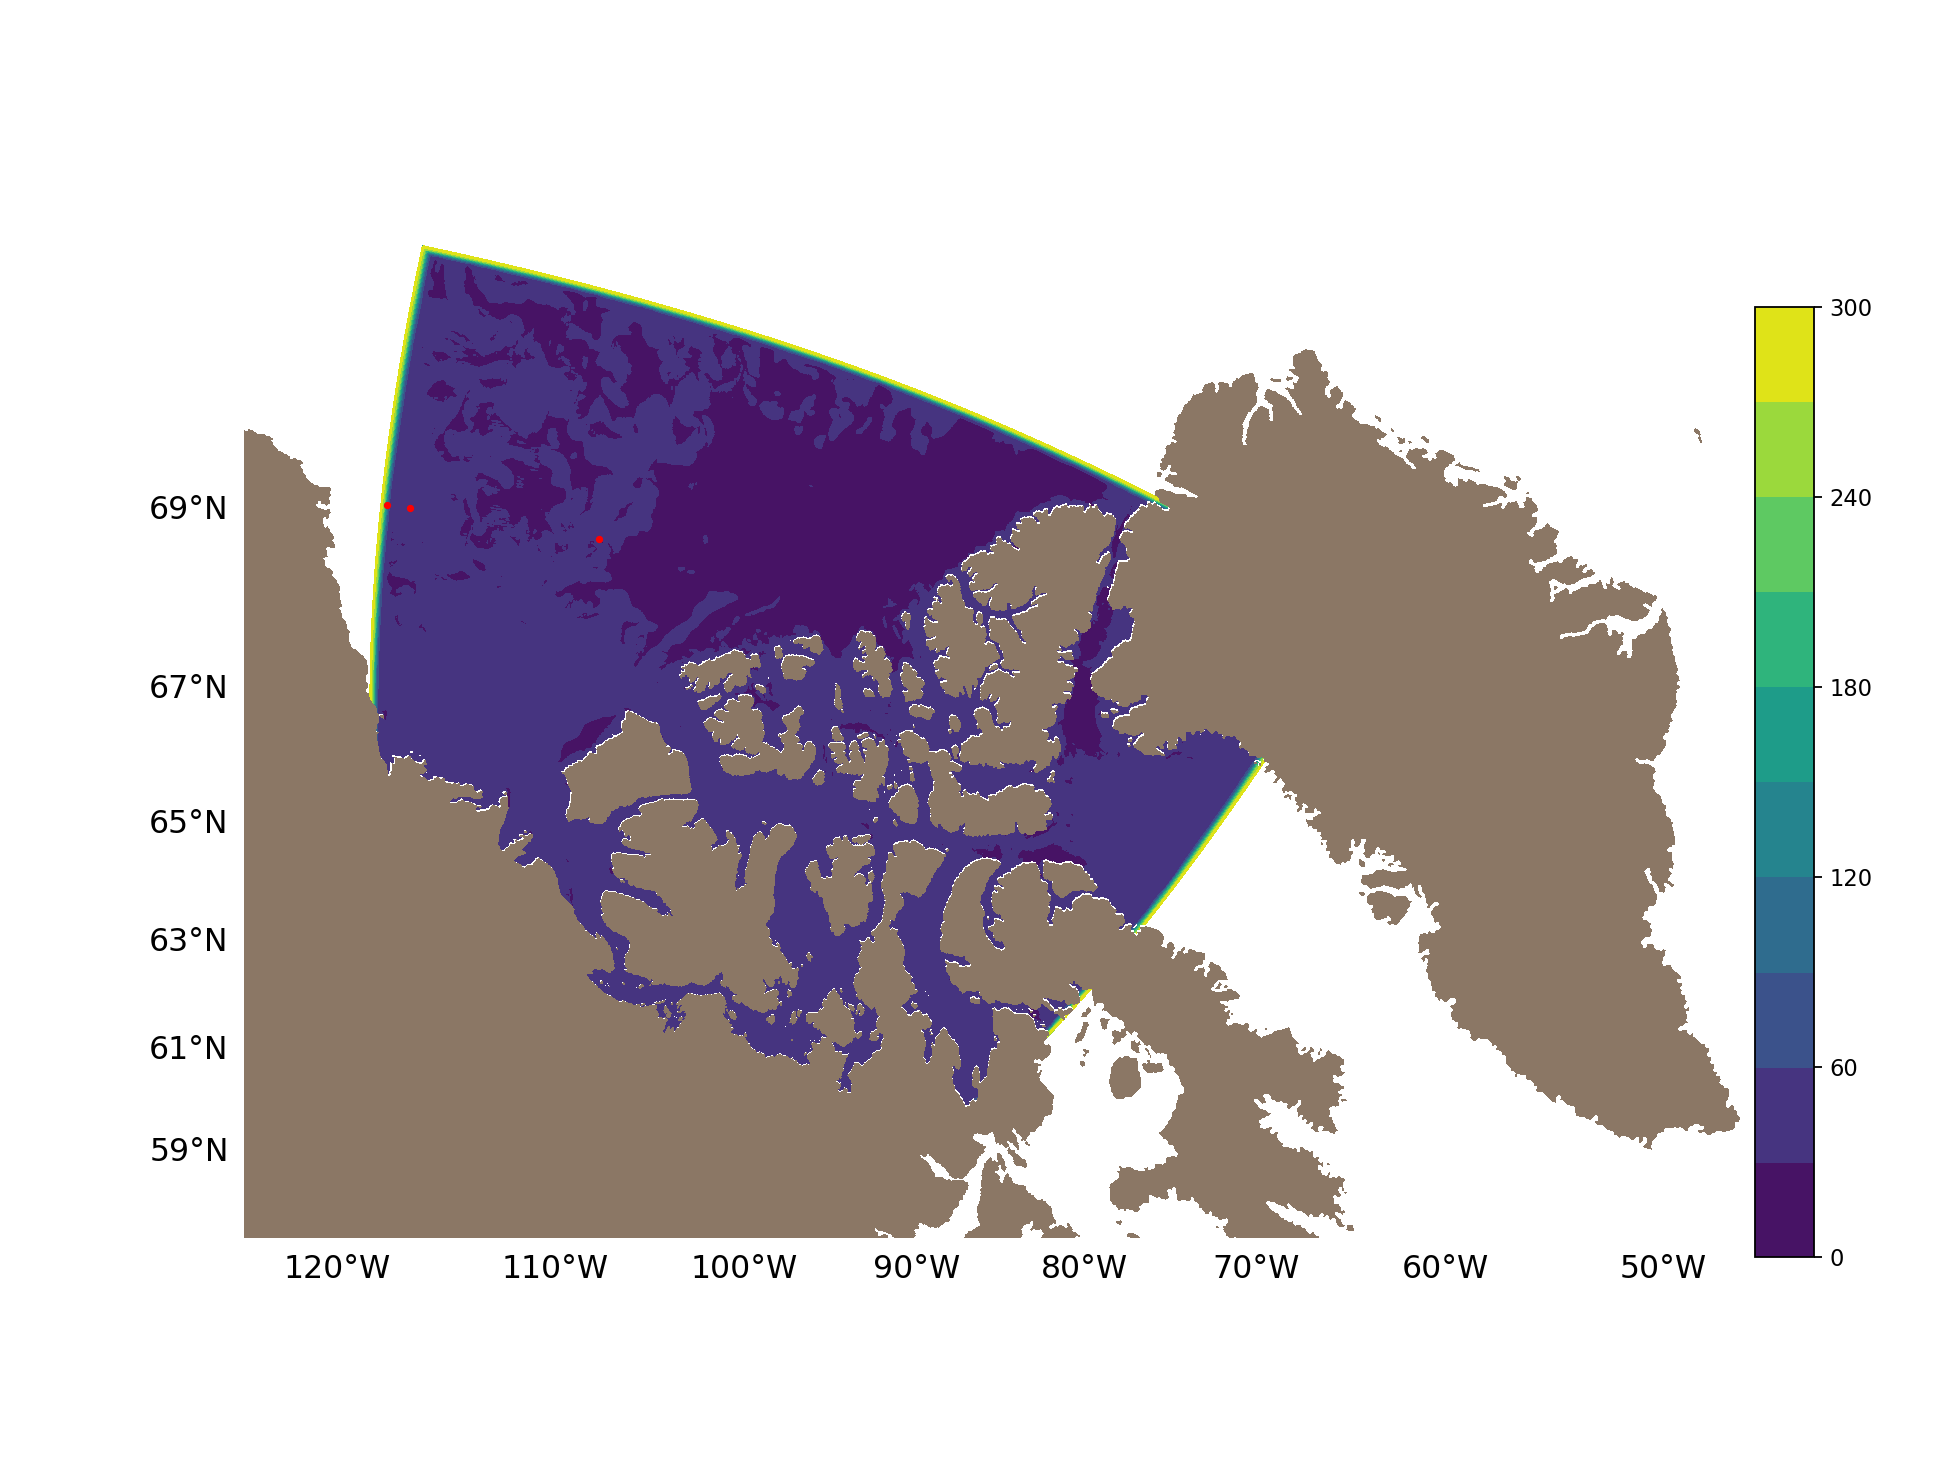

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [21]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

x, y = proj1(lon_model[imin:imax, jmin:jmax], lat_model[imin:imax, jmin:jmax])
CB1 = proj1.contourf(x, y, np.divide(dMn_2005[0,:,:], oMn_2005[0,:,:]), 10, vmin=0, vmax=300)

x_stn, y_stn = proj1([lon_model[imin+679,jmin+stn1j],lon_model[imin+694,jmin+stn1j],lon_model[imin+stn1i,jmin+stn1j]],\
                    [lat_model[imin+679,jmin+stn1j],lat_model[imin+694,jmin+stn1j],lat_model[imin+stn1i,jmin+stn1j]])

proj1.scatter(x_stn, y_stn, c='r', s=5)

cbaxes = fig.add_axes([0.90, 0.14, 0.03, 0.65]) 
CBar = plt.colorbar(CB1, ax=ax1, cax=cbaxes) 

Is this the same in the initial conditions?

In [28]:
inif = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/IC/Mn_ini_20180716.nc')
ini_dMn = np.array(inif.variables['dMn'])[0,:,imin:imax,jmin:jmax]
ini_oMn = np.array(inif.variables['oMn'])[0,:,imin:imax,jmin:jmax]

<IPython.core.display.Javascript object>


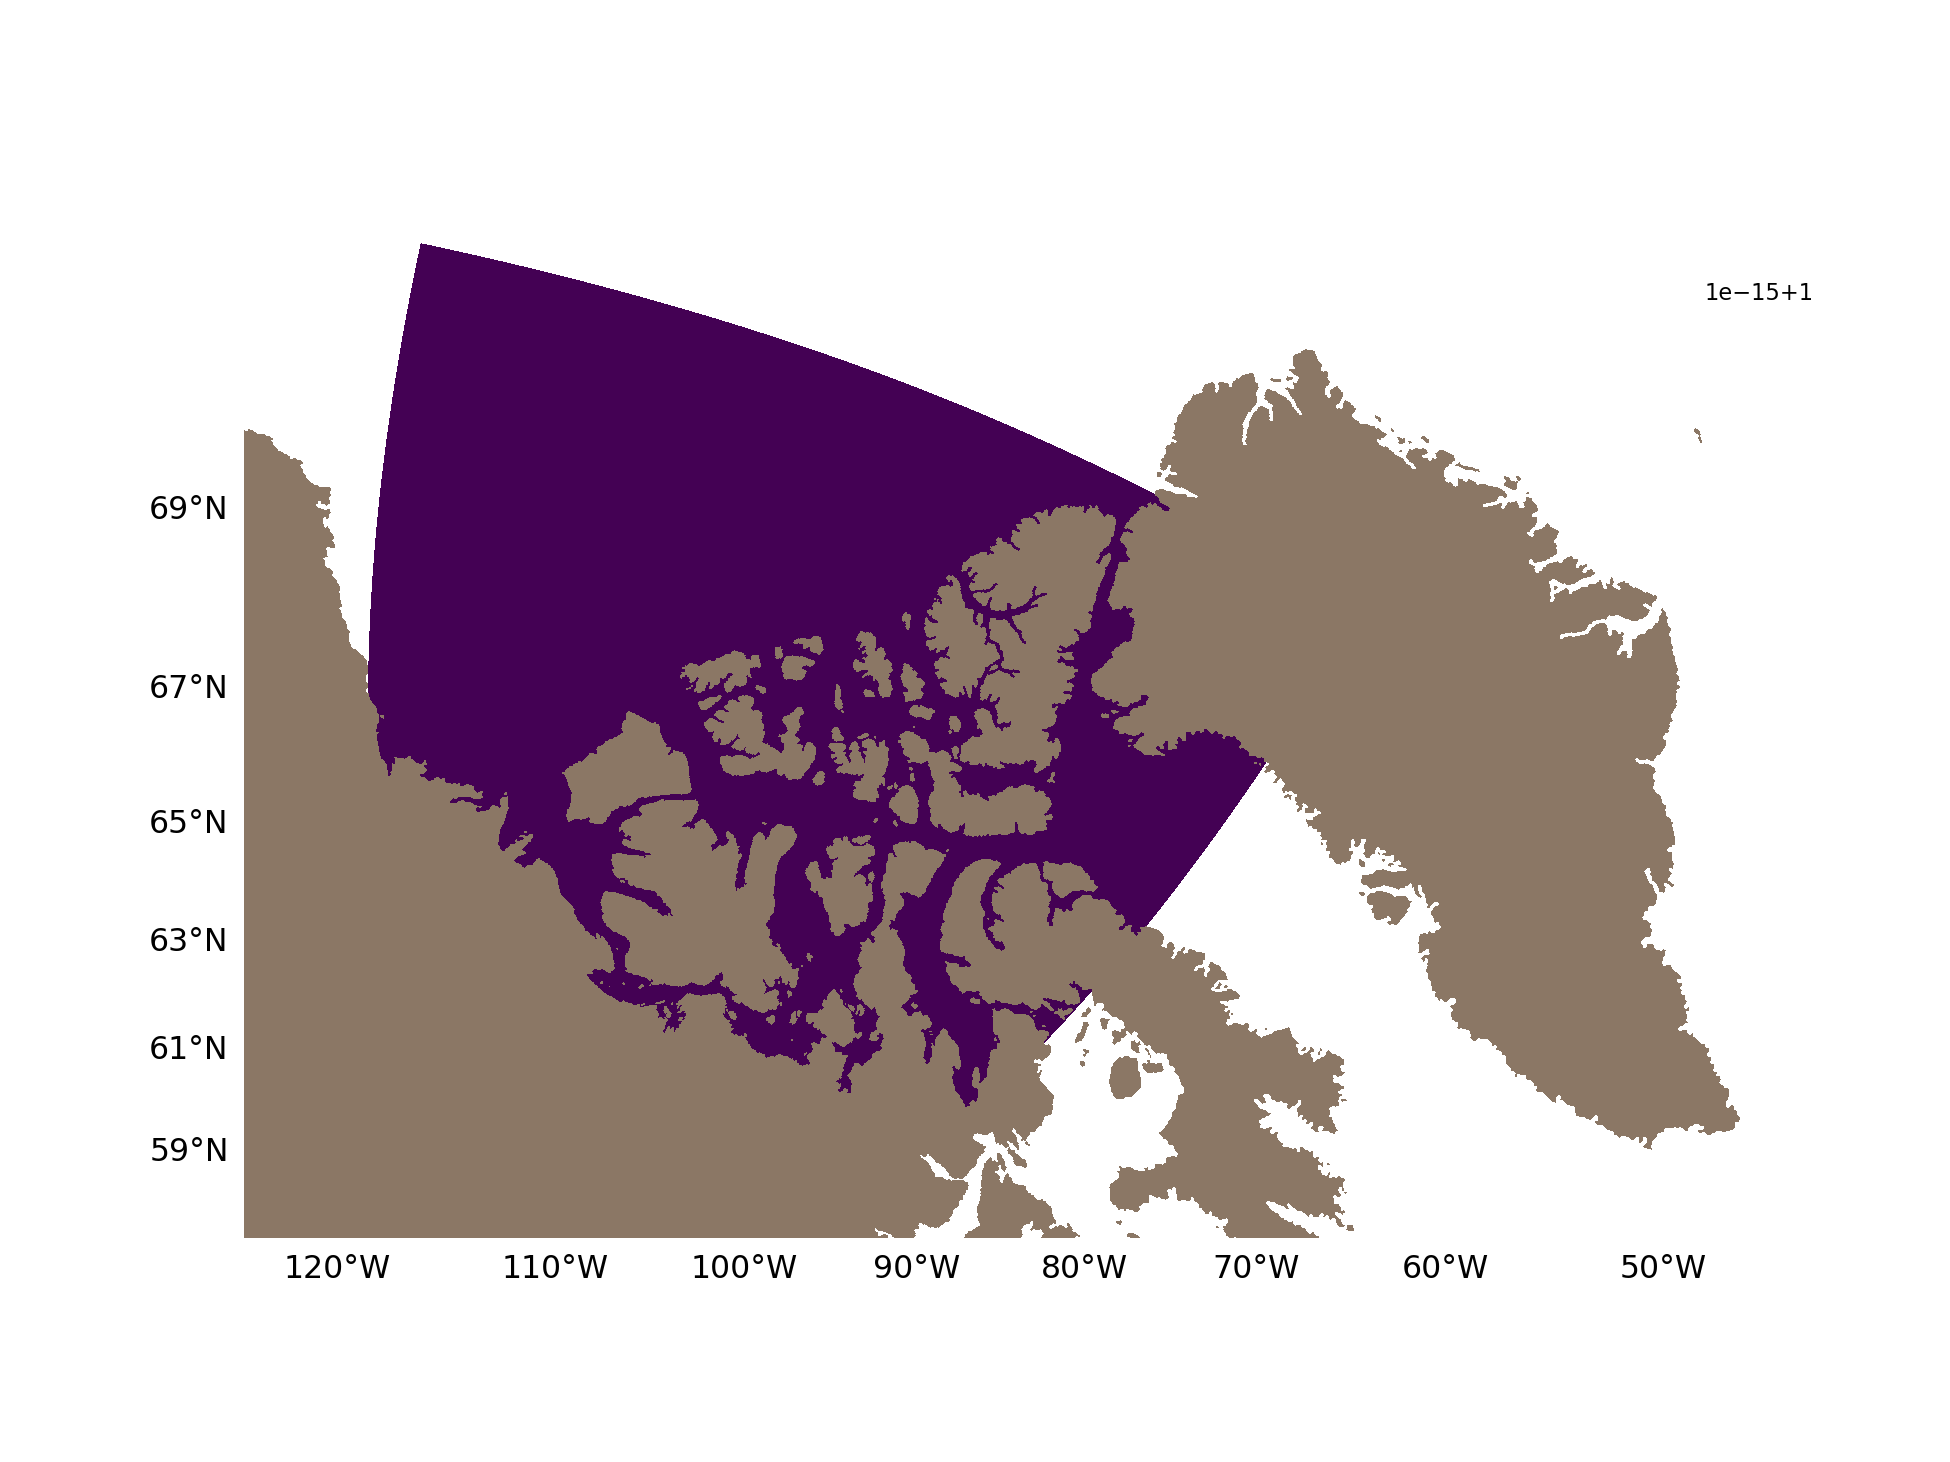

/home/brogalla/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:1042: RuntimeWarning: invalid value encountered in true_divide
  z = np.take(y, i0) + (xn - np.take(b, i0)) * dy / db


In [29]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

x, y = proj1(lon_model[imin:imax, jmin:jmax], lat_model[imin:imax, jmin:jmax])
CB1 = proj1.contourf(x, y, np.divide(ini_dMn[0,:,:], ini_oMn[0,:,:]), 100, vmin=246, vmax=300)

cbaxes = fig.add_axes([0.90, 0.14, 0.03, 0.65]) 
CBar = plt.colorbar(CB1, ax=ax1, cax=cbaxes) 

In [125]:
print('Oxidised: ', np.amax(ini_oMn[:,694,stn1j]), np.amin(ini_oMn[:,694,stn1j]))
print('Dissolved: ', np.amax(ini_dMn[:,694,stn1j]), np.amin(ini_dMn[:,694,stn1j]))

Oxidised:  8.209693250682918e-11 9.269748902949829e-12
Dissolved:  3.1310418110093824e-09 2.676736333217296e-10


## Fix issue by taking boundary values from Mn reference run year 2005

<IPython.core.display.Javascript object>


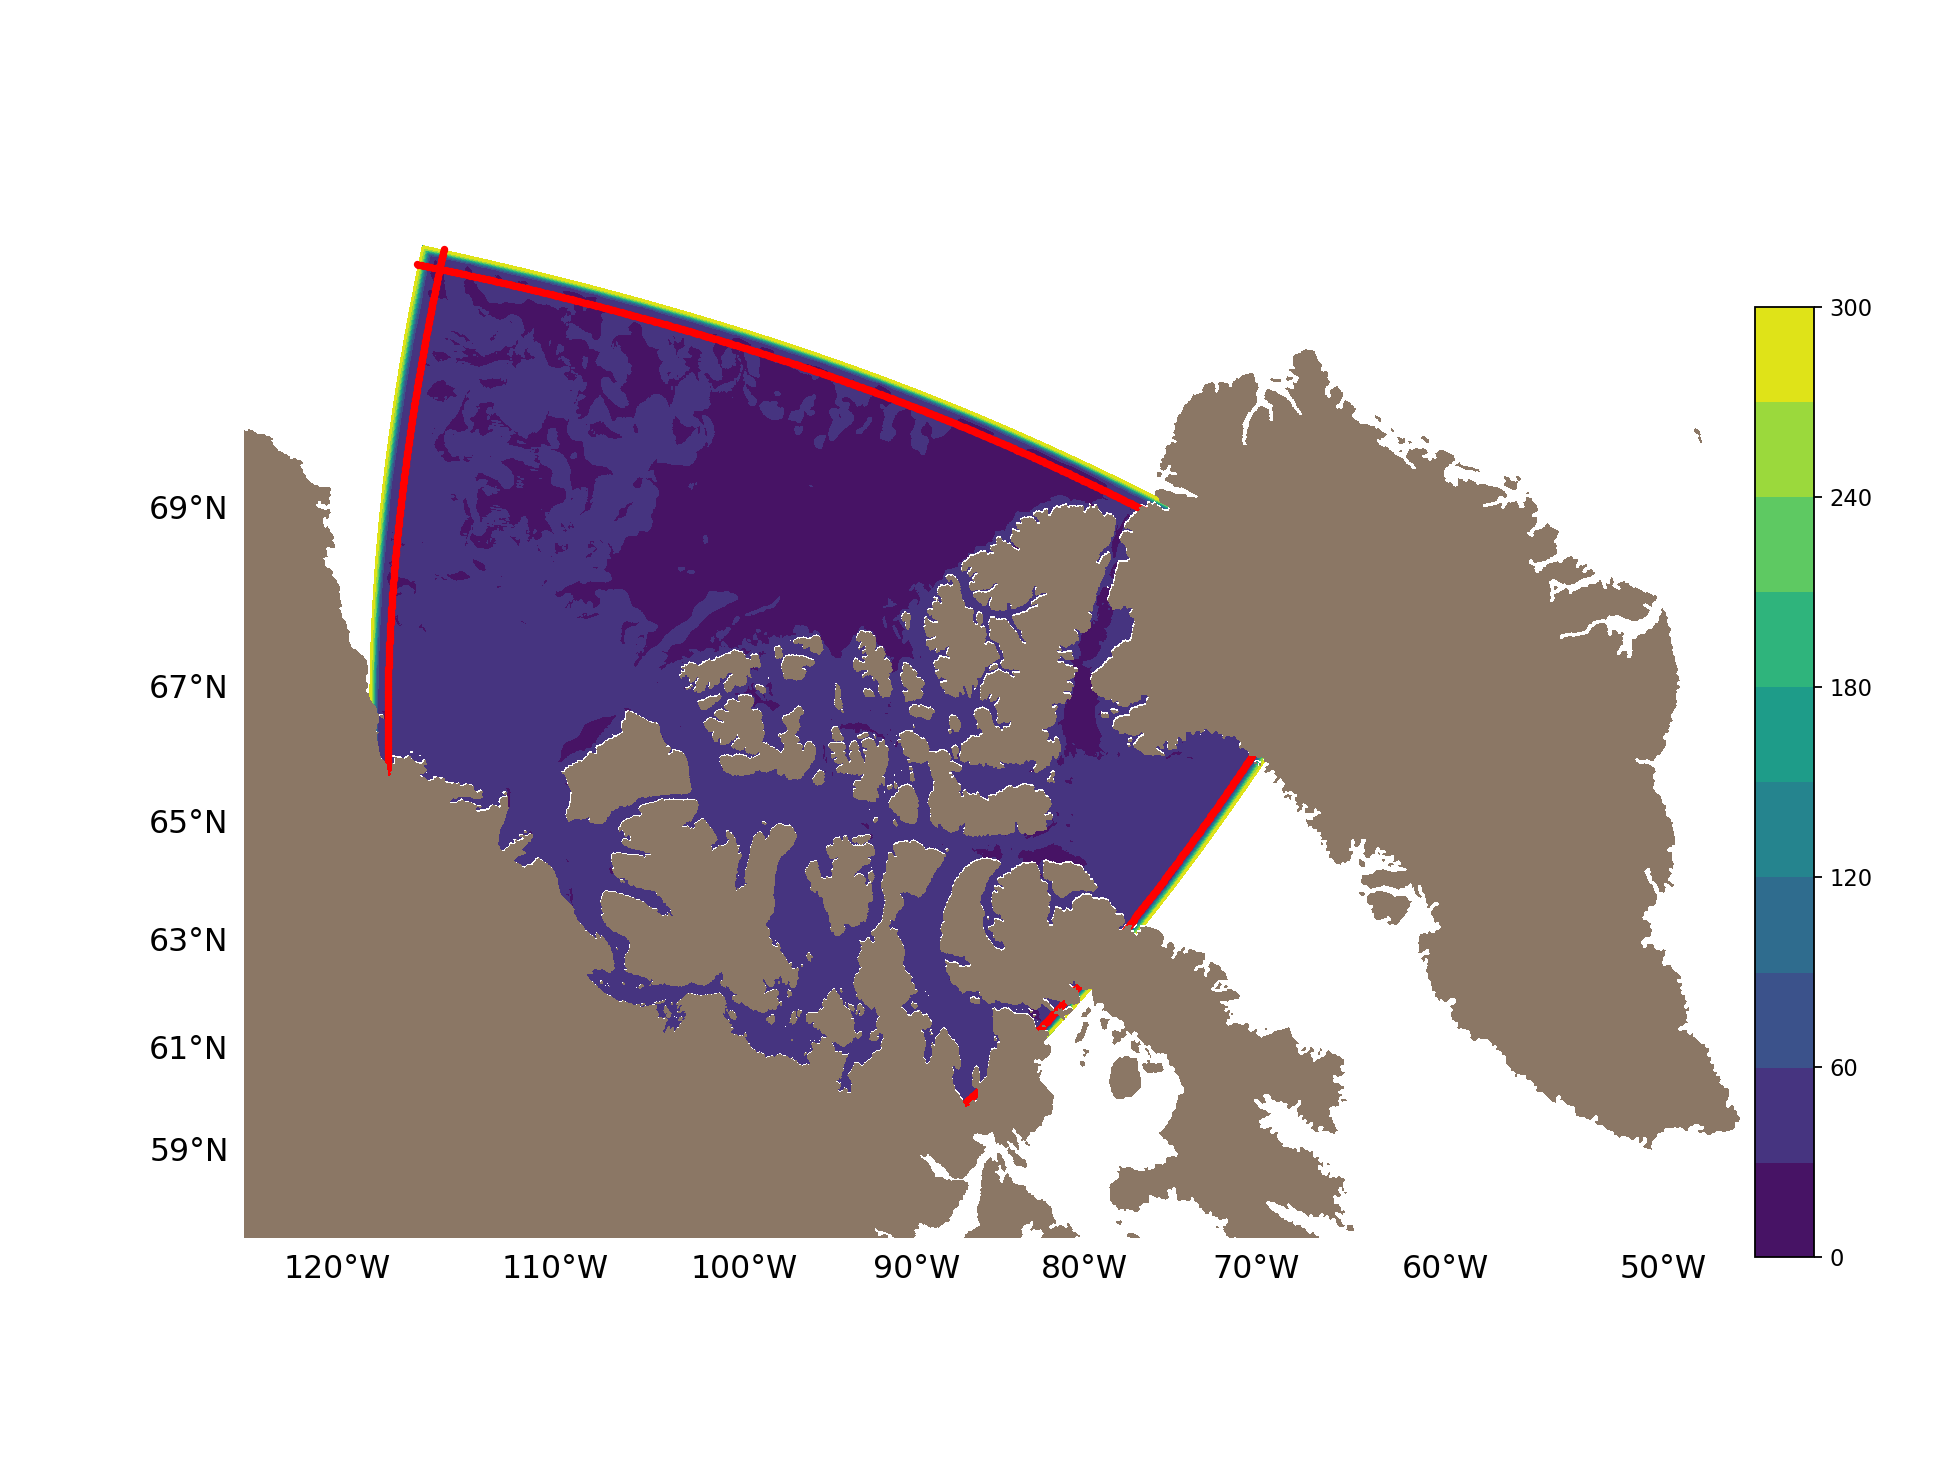

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [136]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

x, y = proj1(lon_model[imin:imax, jmin:jmax], lat_model[imin:imax, jmin:jmax])
CB1 = proj1.contourf(x, y, np.divide(dMn_2005[0,:,:], oMn_2005[0,:,:]), 10, vmin=0, vmax=300)

x_stnN, y_stnN = proj1(lon_model[imin+685,jmin:jmax], lat_model[imin+685,jmin:jmax])
x_stnE, y_stnE = proj1(lon_model[imin:imax,785], lat_model[imin:imax,785])
x_stnS, y_stnS = proj1(lon_model[imin+10,jmin:jmax], lat_model[imin+10,jmin:jmax])

proj1.scatter(x_stnN, y_stnN, c='r', s=5)
proj1.scatter(x_stnE, y_stnE, c='r', s=5)
proj1.scatter(x_stnS, y_stnS, c='r', s=5)

cbaxes = fig.add_axes([0.90, 0.14, 0.03, 0.65]) 
CBar = plt.colorbar(CB1, ax=ax1, cax=cbaxes) 

Create BCs:

In [27]:
dMn_north = dMn_2005[:,675:685,41:638]
oMn_north = oMn_2005[:,675:685,41:638]

dMn_east = dMn_2005[:,1:698,603:623]
oMn_east = oMn_2005[:,1:698,603:623]

dMn_south = dMn_2005[:,12:22,21:638]
oMn_south = oMn_2005[:,12:22,21:638]

Replace zeros with average value at that depth:

In [38]:
for z in range(0,50):
    # Replace zero values:
    dMn_south[dMn_south == 0] = np.average(dMn_south[z,:,:])
    oMn_south[oMn_south == 0] = np.average(oMn_south[z,:,:])
    dMn_north[dMn_north == 0] = np.average(dMn_north[z,:,:])
    oMn_north[oMn_north == 0] = np.average(oMn_north[z,:,:])
    dMn_east[dMn_east == 0]   = np.average(dMn_east[z,:,:])
    oMn_east[oMn_east == 0]   = np.average(oMn_east[z,:,:])
    
    # Replace ratios that are off:
    dMn_south[(dMn_south/oMn_south) > 50] = np.average(dMn_south[z,:,:])
    oMn_south[(dMn_south/oMn_south) > 50] = np.average(oMn_south[z,:,:])
    dMn_north[(dMn_north/oMn_north) > 50] = np.average(dMn_north[z,:,:])
    oMn_north[(dMn_north/oMn_north) > 50] = np.average(oMn_north[z,:,:])
    dMn_east[(dMn_east/oMn_east) > 50] = np.average(dMn_east[z,:,:])
    oMn_east[(dMn_east/oMn_east) > 50] = np.average(oMn_east[z,:,:])

In [39]:
print('North: ', np.sum(dMn_north == 0), np.sum(oMn_north == 0))
print('East: ',  np.sum(dMn_east == 0),  np.sum(oMn_east  == 0))
print('South: ', np.sum(dMn_south == 0), np.sum(oMn_south == 0))

North:  0 0
East:  0 0
South:  0 0


In [41]:
rimwidth_north = 10
rimwidth_east  = 20
rimwidth_south = 10

In [42]:
def flatten_input(var):
    b = var[0,:,:].flatten()
    for i in range(1,len(var)):
        a = var[i,:,:].flatten()
        b = np.vstack((b,a))
    return b

In [43]:
def create_boundary(rimwidth, boundary_dMn, boundary_oMn):
    
    dMn_O = flatten_input(boundary_dMn)
    oMn_O = flatten_input(boundary_oMn)
    
    dMn_OBC = np.reshape(dMn_O, (1,50,1,np.max(boundary_dMn.shape)*rimwidth))
    oMn_OBC = np.reshape(oMn_O, (1,50,1,np.max(boundary_dMn.shape)*rimwidth))

    return dMn_OBC, oMn_OBC

In [44]:
dMn_north_BC, oMn_north_BC = create_boundary(rimwidth_north, dMn_north, oMn_north)
dMn_east_BC,  oMn_east_BC  = create_boundary(rimwidth_east, dMn_east, oMn_east)
dMn_south_BC, oMn_south_BC = create_boundary(rimwidth_south, dMn_south, oMn_south)

plot these boundary conditions:

<IPython.core.display.Javascript object>


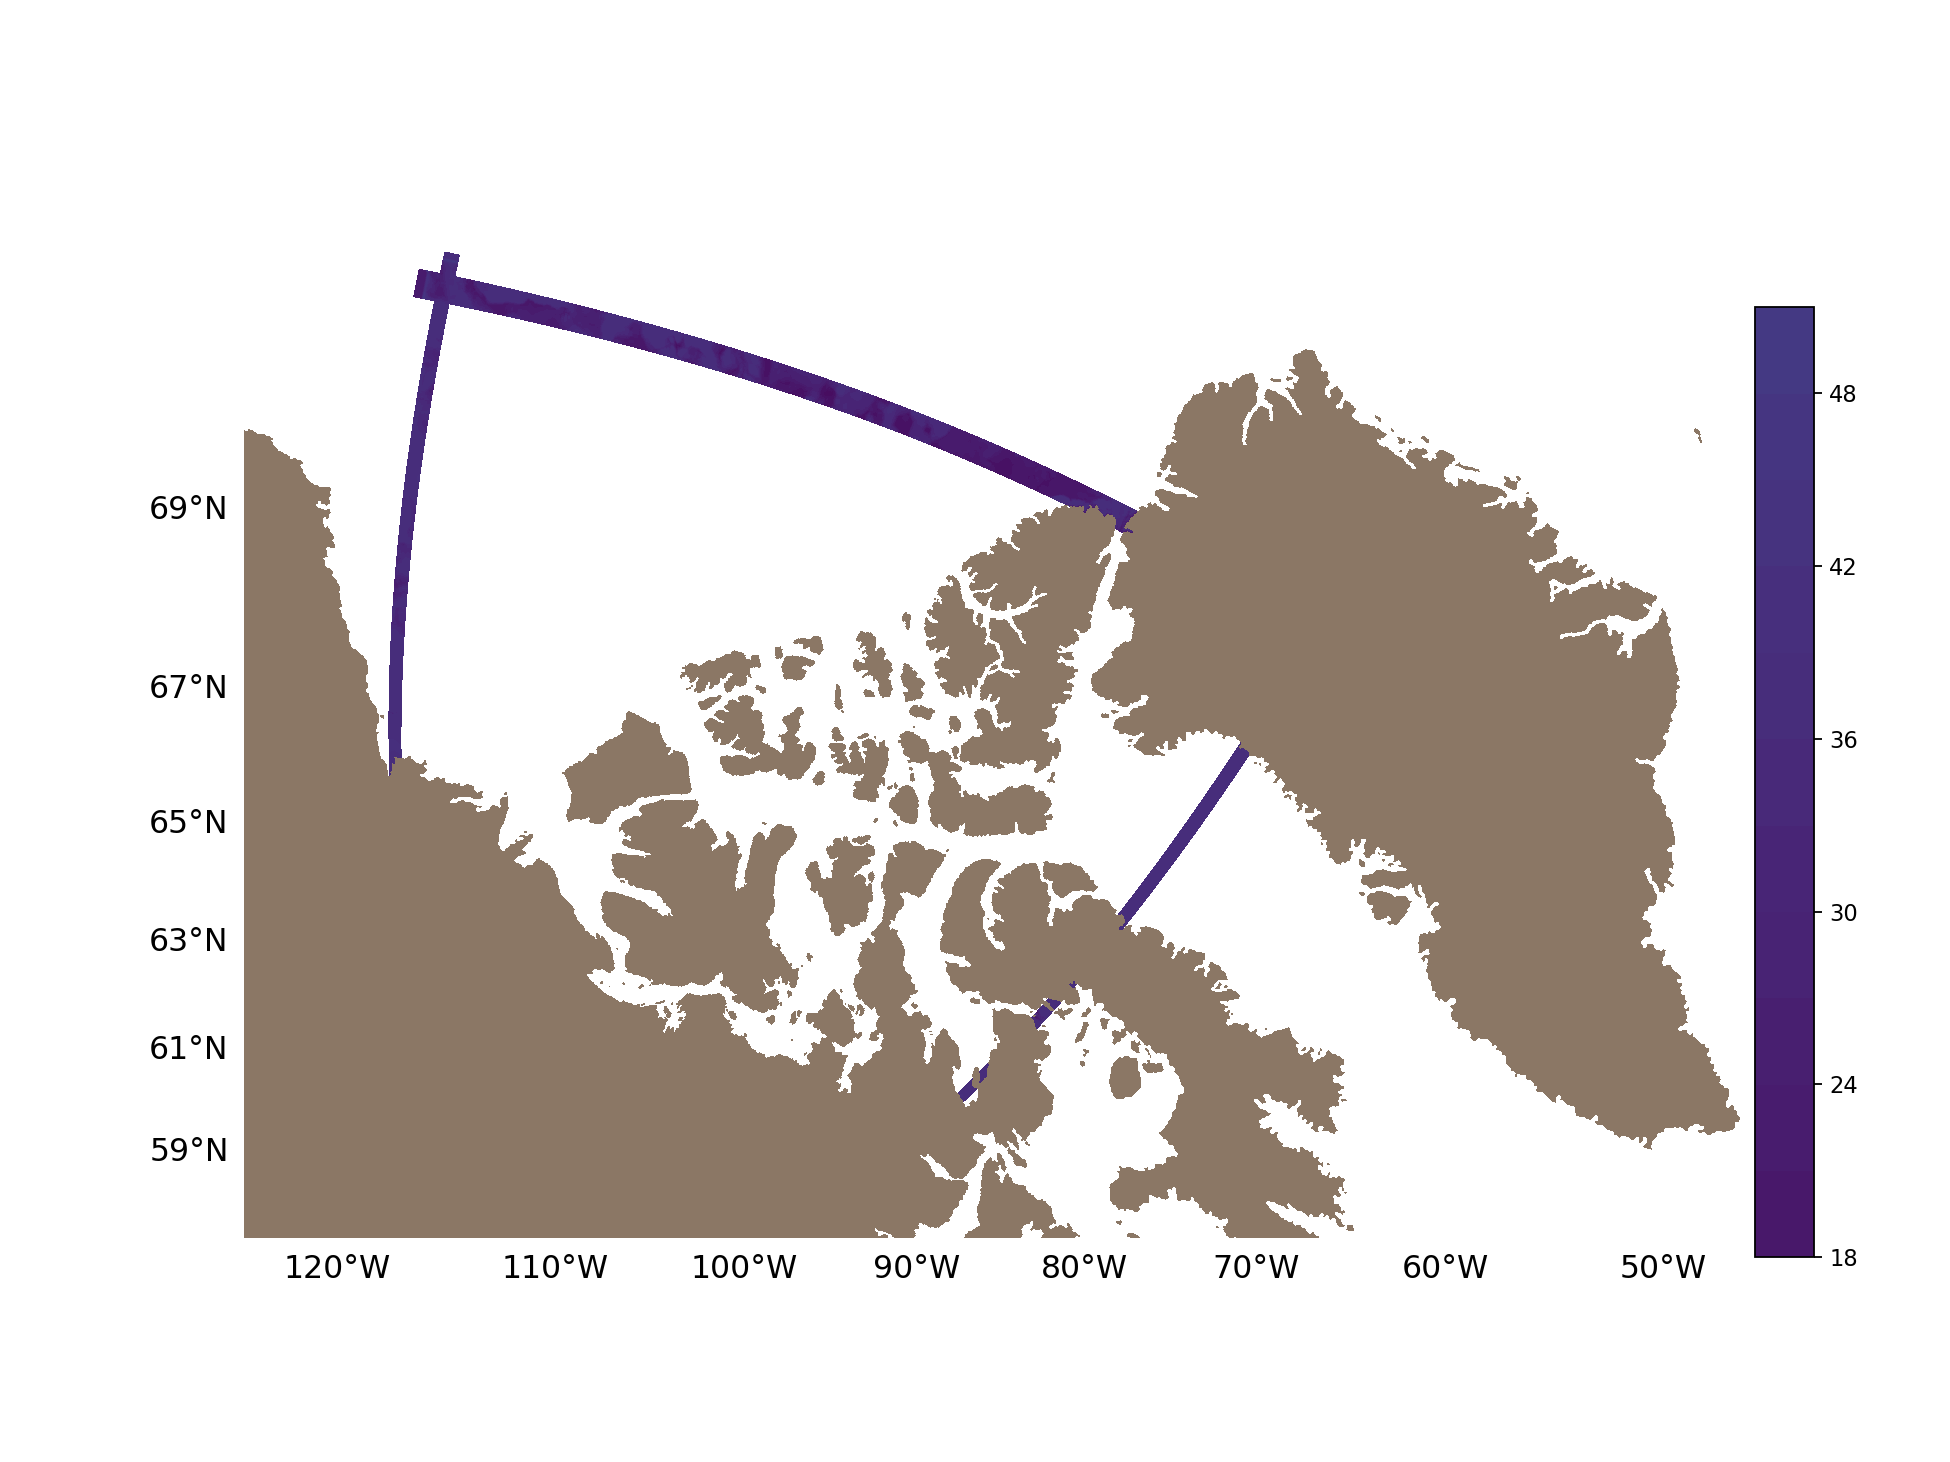

In [45]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

xN, yN = proj1(lon_model[imin+675:imin+685, jmin+41:jmin+638], lat_model[imin+675:imin+685, jmin+41:jmin+638])
xE, yE = proj1(lon_model[imin+1:imin+698, jmin+603:jmin+623], lat_model[imin+1:imin+698, jmin+603:jmin+623])
xS, yS = proj1(lon_model[imin+12:imin+22, jmin+21:jmin+638], lat_model[imin+12:imin+22, jmin+21:jmin+638])
CB1 = proj1.contourf(xN, yN, np.divide(dMn_north[0,:,:], oMn_north[0,:,:]), 10, vmin=0, vmax=300)
proj1.contourf(xE, yE, np.divide(dMn_east[0,:,:], oMn_east[0,:,:]), 10, vmin=0, vmax=300)
proj1.contourf(xS, yS, np.divide(dMn_south[0,:,:], oMn_south[0,:,:]), 10, vmin=0, vmax=300)

# x_stnN, y_stnN = proj1(lon_model[imin+685,jmin:800], lat_model[imin+685,jmin:800])
# x_stnE, y_stnE = proj1(lon_model[imin:2180,785], lat_model[imin:2180,785])
# x_stnS, y_stnS = proj1(lon_model[imin+10,jmin:800], lat_model[imin+10,jmin:800])

# proj1.scatter(x_stnN, y_stnN, c='r', s=5)
# proj1.scatter(x_stnE, y_stnE, c='r', s=5)
# proj1.scatter(x_stnS, y_stnS, c='r', s=5)

cbaxes = fig.add_axes([0.90, 0.14, 0.03, 0.65]) 
CBar = plt.colorbar(CB1, ax=ax1, cax=cbaxes) 

Save the boundary conditions:

In [67]:
def save_BC_file(name, dMn_BC, oMn_BC):
    # Setup the new NetCDF file:
    ncd = nc.Dataset('/ocean/brogalla/GEOTRACES/data/'+name, 'w', zlib=True)
    ncd.createDimension('x', np.max(dMn_BC.shape))
    ncd.createDimension('y',1)
    ncd.createDimension('z',50)
    ncd.createDimension('t',None)
    
    dMn = ncd.createVariable('dMn', 'float64', ('t','z','y','x'))
    dMn.units = 'dissolved Mn'
    dMn.long_name = 'dMn'
    dMn[:] = dMn_BC

    oMn = ncd.createVariable('oMn', 'float64', ('t','z','y','x'))
    oMn.units = 'oxidised Mn'
    oMn.long_name = 'oMn'
    oMn[:] = oMn_BC
    
    ncd.close()
    return

In [47]:
save_BC_file('Mn_North_OBC_20200102.nc', dMn_north_BC, oMn_north_BC)
save_BC_file('Mn_East_OBC_20200102.nc' , dMn_east_BC,  oMn_east_BC)
save_BC_file('Mn_South_OBC_20200102.nc', dMn_south_BC, oMn_south_BC)

#### Look at BC

In [10]:
NOBC = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Mn_North_OBC_20200102.nc')
dmn_NOBC = np.array(NOBC.variables['dMn'])[0,0,:,:].reshape((10,597))

<IPython.core.display.Javascript object>


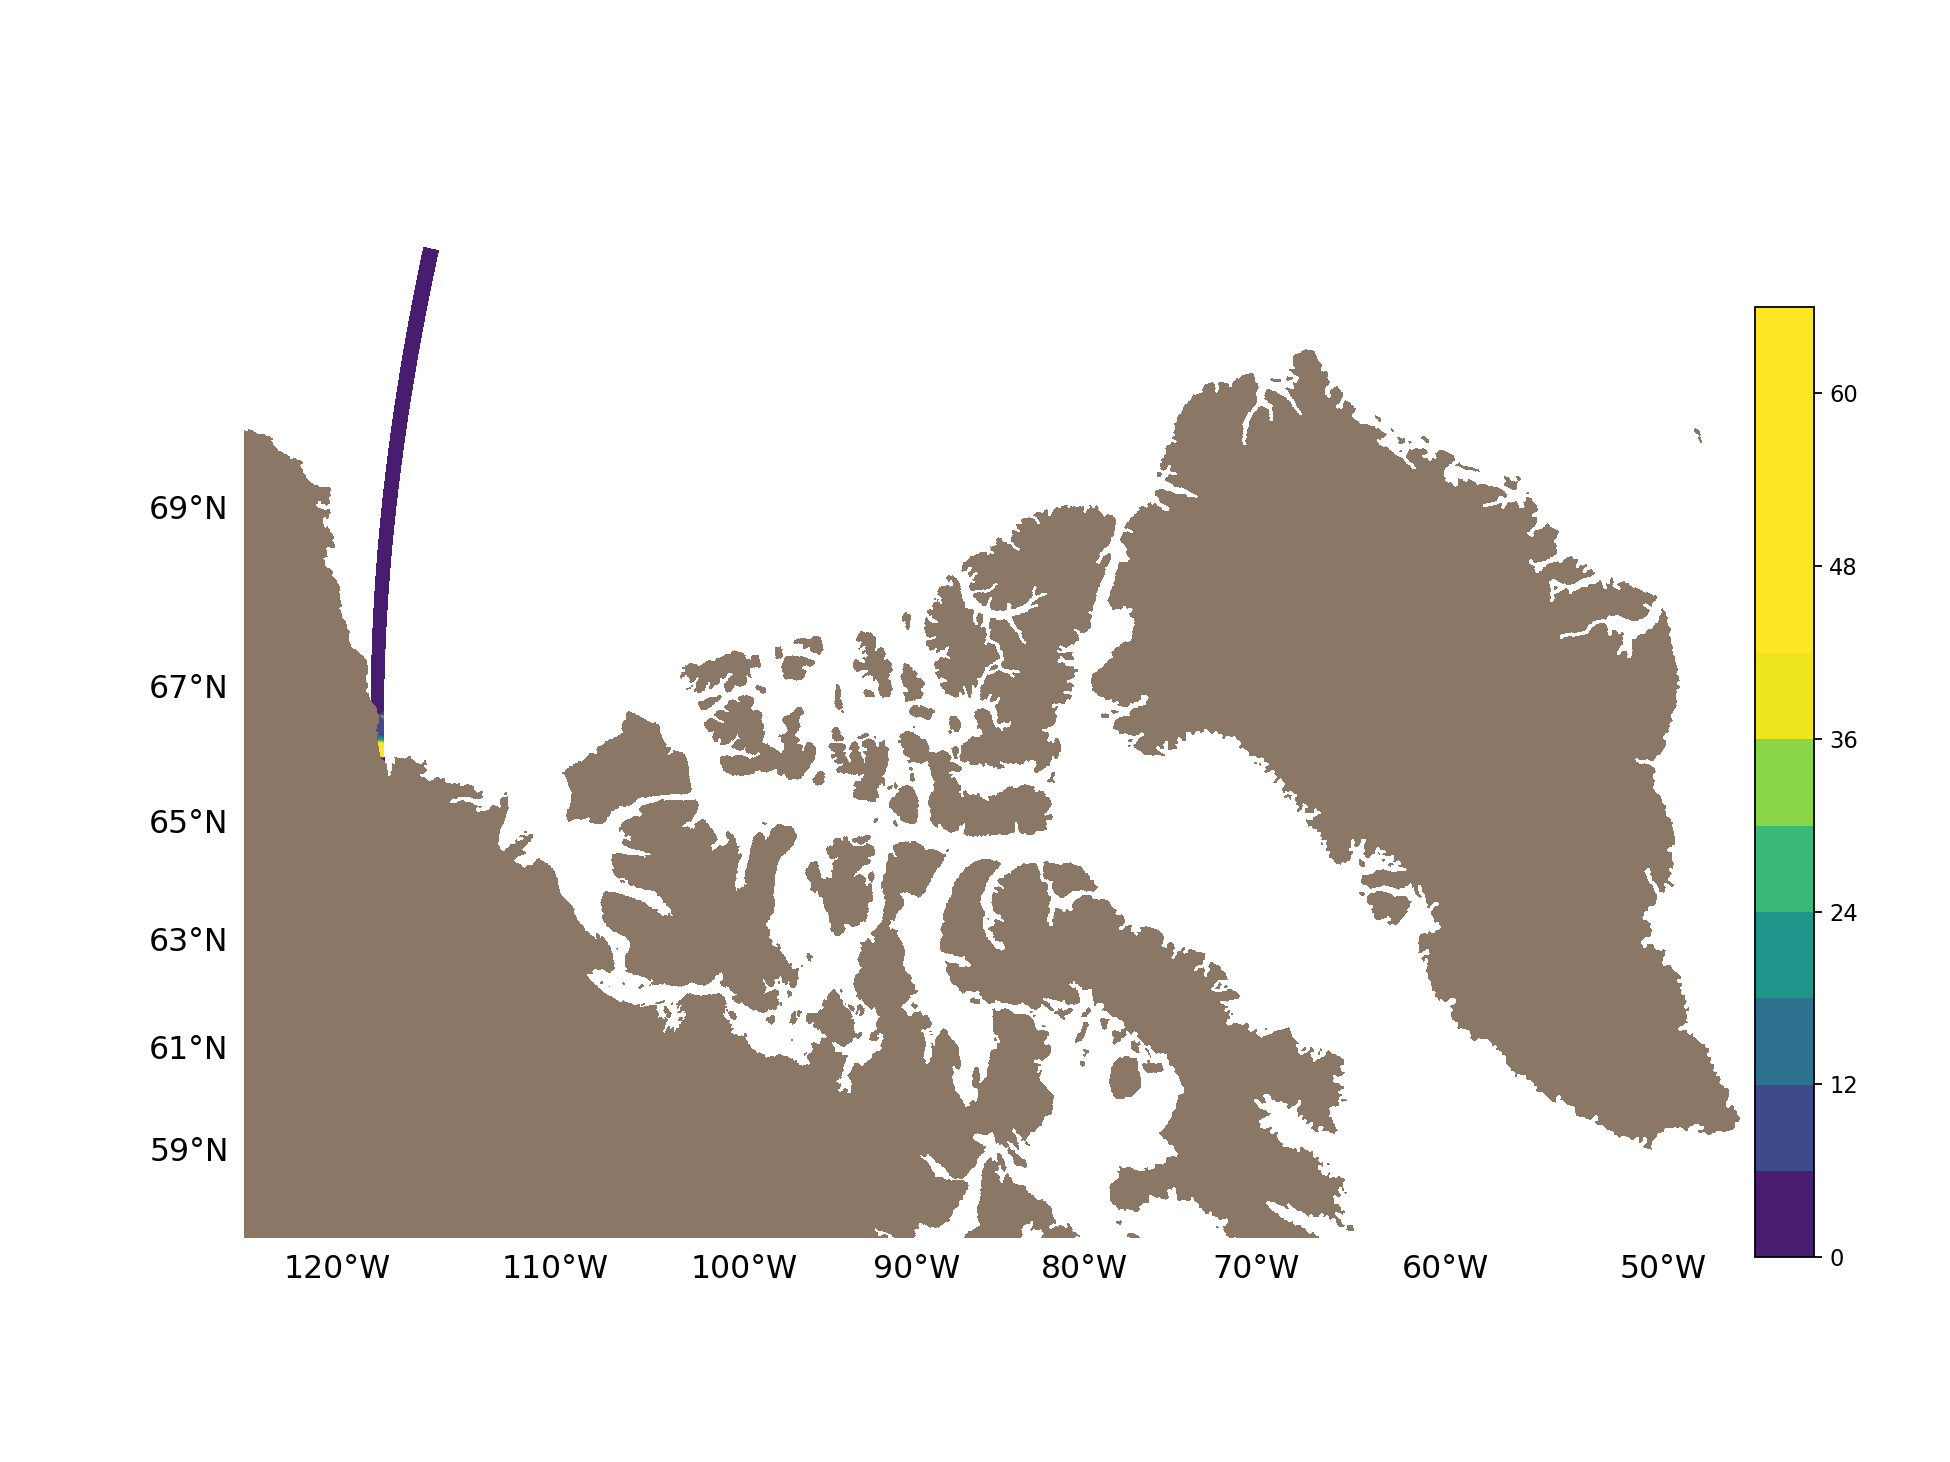

In [13]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

xN, yN = proj1(lon_model[2168:2178, 201:798], lat_model[2168:2178, 201:798])
CB1 = proj1.contourf(xN, yN, dmn_NOBC*10**9, 10, vmin=0, vmax=40)


cbaxes = fig.add_axes([0.90, 0.14, 0.03, 0.65]) 
CBar = plt.colorbar(CB1, ax=ax1, cax=cbaxes) 

Fix this BC:

In [43]:
NOBC = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Mn_North_OBC_20200102.nc')
dmn_NOBC = np.array(NOBC.variables['dMn'])[0,:,:,:].reshape((1,50,10,597))
omn_NOBC = np.array(NOBC.variables['oMn'])[0,:,:,:].reshape((1,50,10,597))

In [58]:
dmn_NOBC[0,:,:,220:270] = dmn_NOBC[0,:,:,300:350]
omn_NOBC[0,:,:,220:270] = omn_NOBC[0,:,:,300:350]

<IPython.core.display.Javascript object>


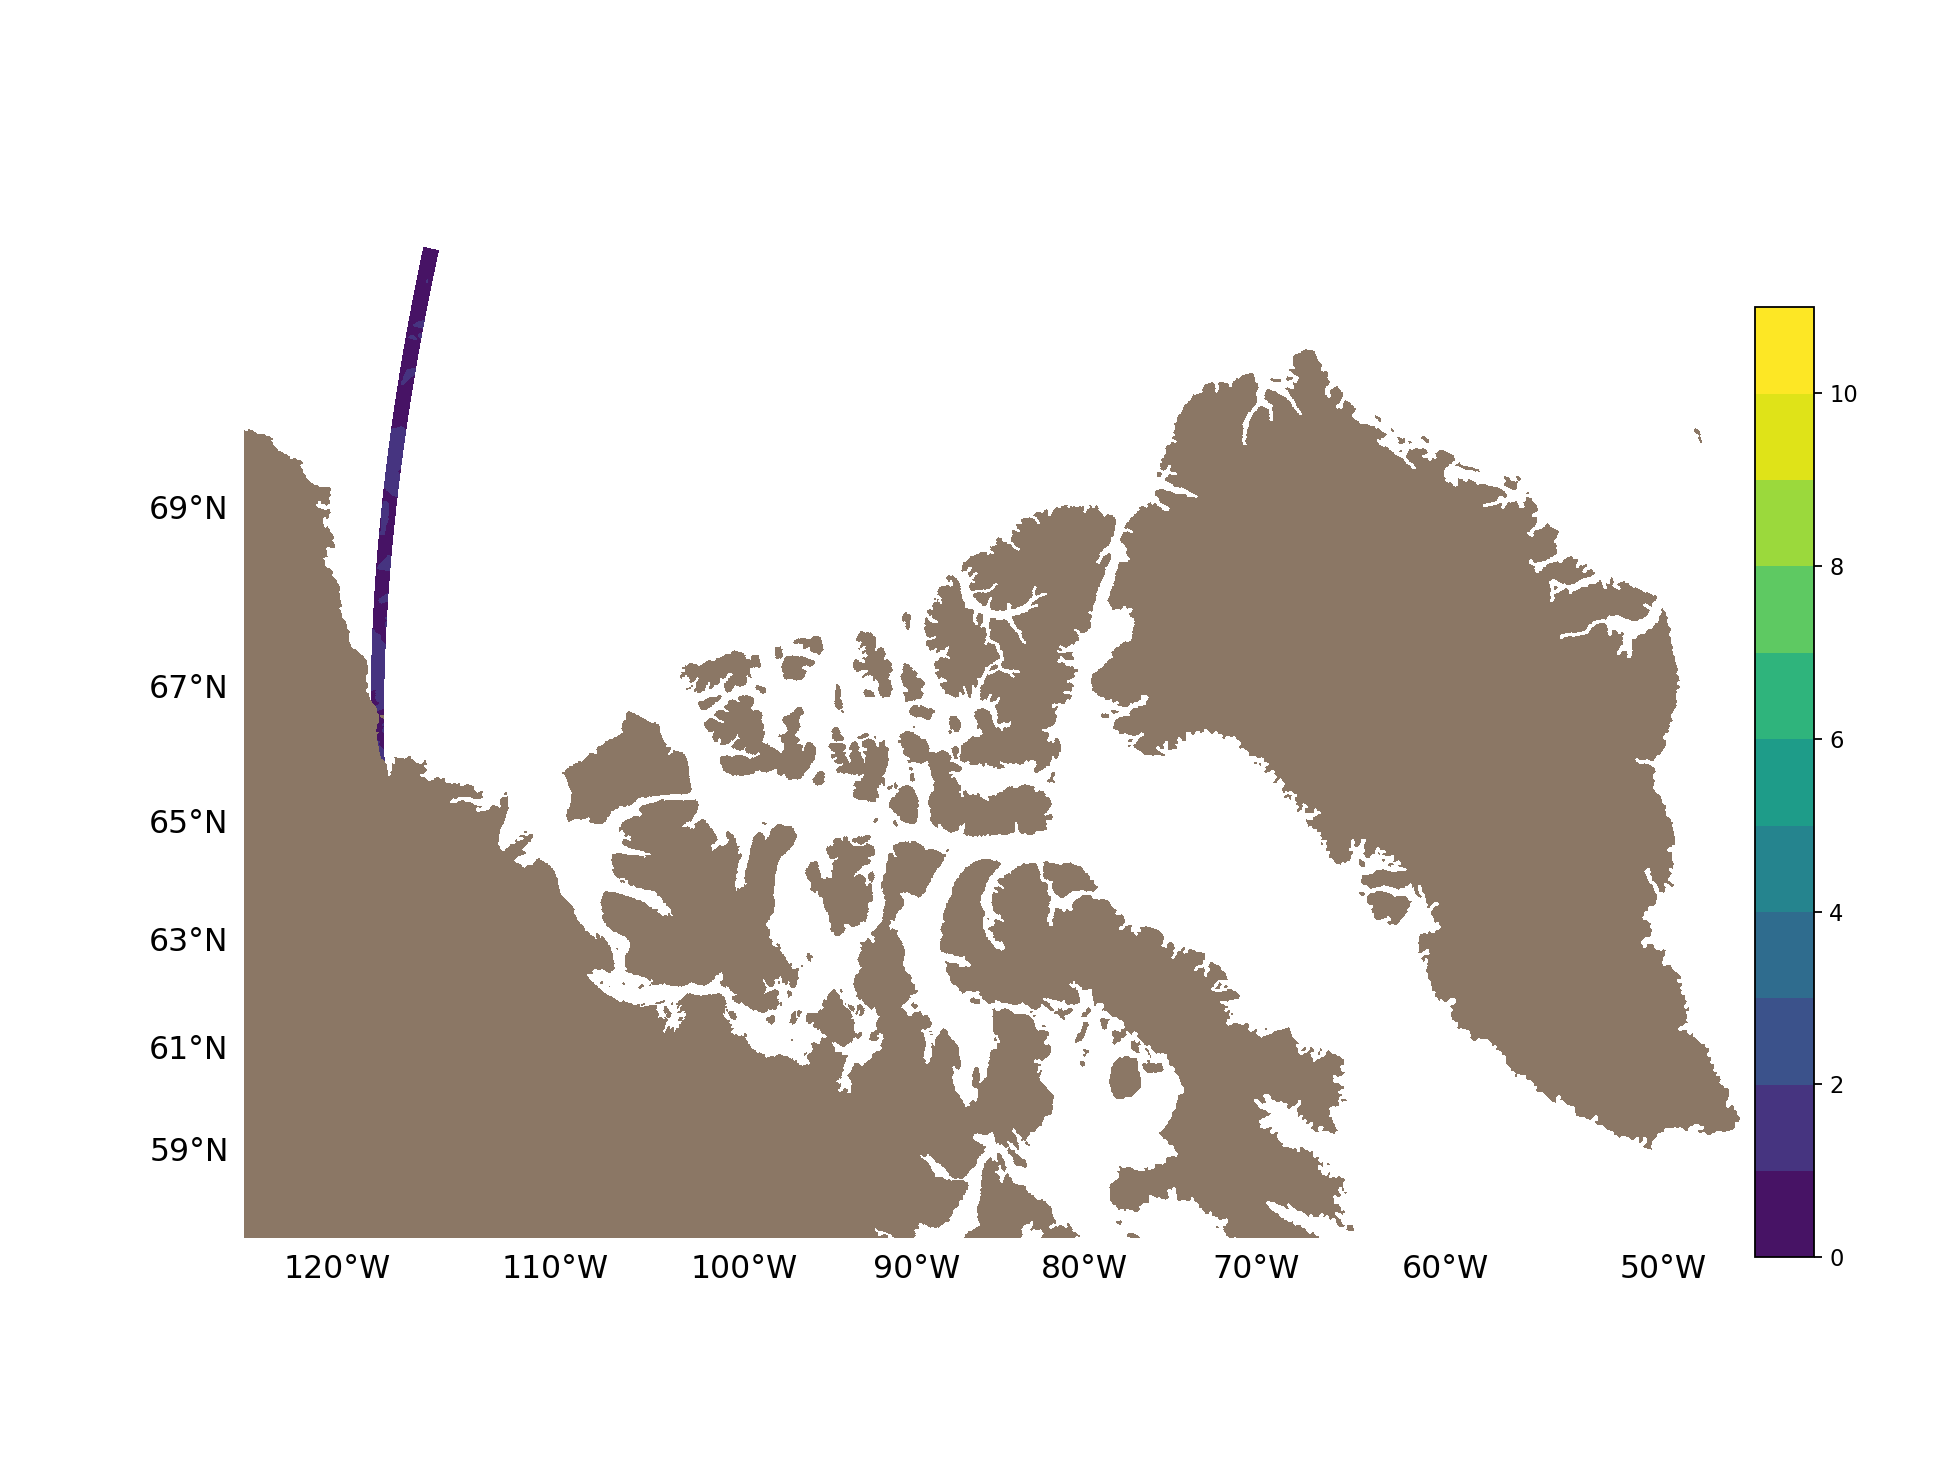

In [60]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

xN, yN = proj1(lon_model[2168:2178, 201:798], lat_model[2168:2178, 201:798])
CB1 = proj1.contourf(xN, yN, omn_NOBC[0,10,:,:]*10**9, [0,1,2,3,4,5,6,7,8,9,10,70], vmin=0, vmax=10)

cbaxes = fig.add_axes([0.90, 0.14, 0.03, 0.65]) 
CBar = plt.colorbar(CB1, ax=ax1, cax=cbaxes) 

In [65]:
dmn_NOBC_final = dmn_NOBC.reshape((1,50,1,5970))
omn_NOBC_final = omn_NOBC.reshape((1,50,1,5970))

In [70]:
save_BC_file('Mn_North_OBC_20200327.nc', dmn_NOBC_final, omn_NOBC_final)